In [1]:
import numpy as np
from scipy.linalg import expm
from math import pi
import matplotlib.pyplot as plt

$\bullet$ Exponential midpoint for $$Y'(t)= A(t) Y(t)$$ with 

$$A(t) = \begin{bmatrix}
i && 2+i- \cos(2 \pi t) \\
-2+i + \cos(2 \pi t) && 3i 
\end{bmatrix}$$

skew-hermitian matrix


In [2]:
def rhs(t):
    #return np.array([[0,np.cos(t),np.sin(t)],[-np.cos(t),0,-np.sin(2*pi*t)],[-np.sin(t),np.sin(2*pi*t),0]]) #skew-symmetric matrix
    return np.array([[1j,2+1j - np.cos(2*pi*t)],[-2+1j+np.cos(2*pi*t),3*1j]]) #skew-hermitian matrix


In [3]:
ts = 4000
a = 0
b = 1
t = np.linspace(a,b,ts+1)
k = (b-a)/ts

#y0 = [1/np.sqrt(3),1/np.sqrt(3),1/np.sqrt(3)]
y0 = [1/np.sqrt(2),1/np.sqrt(2)]
y = np.zeros([len(y0),ts+1],dtype=np.complex_)
y[:,0] = y0

In [4]:
for n in range(0,ts):
    y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]

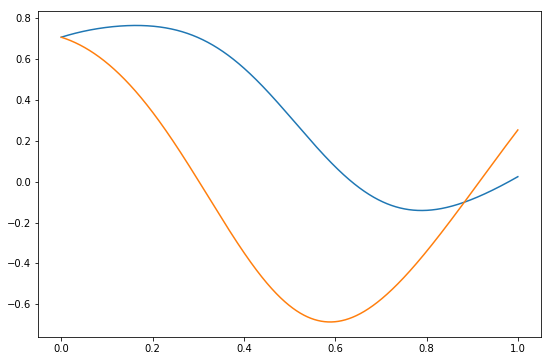

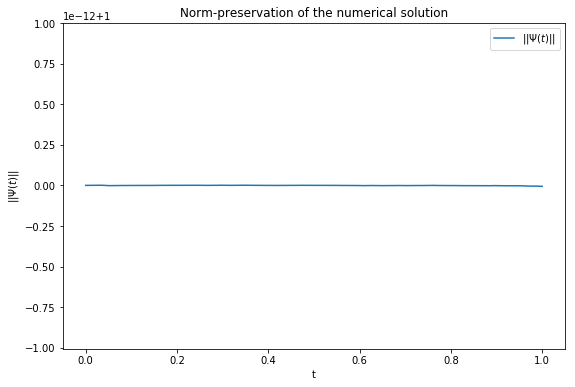

1.0000000000000016 0.9999999999999941


array([[0.70710678+0.00000000e+00j, 0.7072834 +3.53641731e-04j,
        0.70745972+7.07459952e-04j, ..., 0.0238521 -5.31623564e-02j,
        0.02416991-5.33348393e-02j, 0.02448789-5.35070071e-02j],
       [0.70710678+0.00000000e+00j, 0.70692967+7.07018290e-04j,
        0.7067519 +1.41385918e-03j, ..., 0.25165202-9.66062162e-01j,
        0.2523838 -9.65853834e-01j, 0.25311538-9.65644834e-01j]])

In [5]:
plt.figure(figsize=(9,6))
plt.plot(t,np.real(y[0,:]),'-',t,np.real(y[1,:]),'-')
plt.show()


cons = []
for k in range(y.shape[1]):
      cons.append(np.linalg.norm(y[:,k],2))

plt.figure(figsize=(9,6))
plt.plot(t,cons,'-',label='$||\Psi(t)||$')
plt.title('Norm-preservation of the numerical solution')
plt.xlabel('t')
plt.ylabel('$||\Psi(t)||$')
plt.legend()
plt.show()
print(np.max(cons),np.min(cons)) #okay

$\bullet$ Convergence 

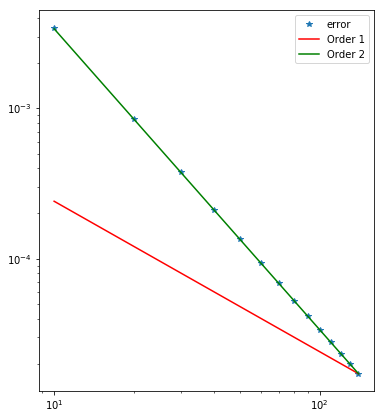

In [6]:
err = []
yRif = y

tsrange = np.arange(10,150,10)
for ts in tsrange:
    t = np.linspace(a,b,ts+1)
    k = (b-a)/ts
    y = np.zeros([len(y0),ts+1],dtype=np.complex_)
    y[:,0] = y0
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    err.append(np.linalg.norm(y[:,-1] - yRif[:,-1],np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 1,'r',label='Order 1')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 2,'g',label='Order 2')
plt.legend()
plt.show()

$\bullet$ Exponential midpoint with **not** skew-symmetrix matrix $A(t)$

In [7]:
def rhs(t):
    return np.array([[np.sin(2*pi*t),t-5],[t+1,-t]]) #non skew-symmetric


ts = 4000
t = np.linspace(a,b,ts+1)
k = (b-a)/ts
y = np.zeros([2,ts+1])
y[:,0] = [1,1]

In [8]:
for n in range(0,ts):
    y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]

Convergence for 
$$Y'(t)= A(t) Y(t)$$

where $$A(t) = \begin{bmatrix}
\sin(2 \pi t) && t-5 \\
t+1 && -t
\end{bmatrix}$$

Expected order of convergence is $2$, by Lubich (2003) error bound.

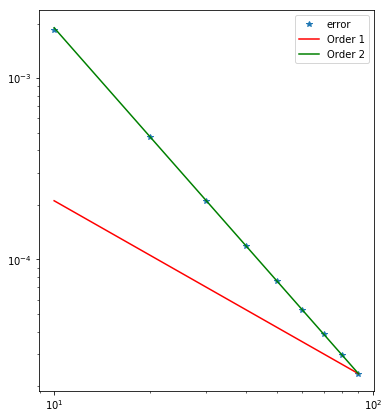

In [9]:
err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(a,b,ts+1)
    k = (b-a)/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    #err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))
    err.append(np.linalg.norm(y[:,-1] - yRif[:,-1],np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 1,'r',label='Order 1')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 2,'g',label='Order 2')
plt.legend()
plt.show()

Convergence for 

$$Y'(t)= A Y(t) $$

where $$A = \begin{bmatrix}
-1 && 0 \\
0 && -1
\end{bmatrix}$$

The exponential midpoint rule is expected to be exact for time-independent problems

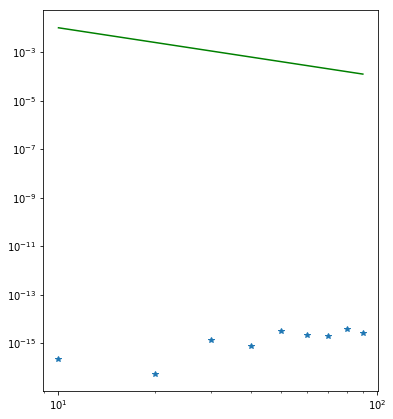

In [10]:
def rhs(t):
    return np.array([[-1,0],[0,-1]])


def uex(t):
    return np.array([np.exp(-t),np.exp(-t)])

err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(k*rhs(t[n] + k/2))@y[:,n]
    
    err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange, 1/tsrange**2,'g',label='Order 2')
plt.show()